# Part 1: Introduction to the Data Domain and the Data Exploration Report

作者:

江煜2023141010073 50%

李竺桓2023141460069 50%

数据集连接[Adult Income](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)

## 1.1 数据集介绍
### 1.1.1 数据来源与背景

`Adult Income Dataset`是一个研究成年收入与各种因素关系的数据集，它可以从[Adult Income](https://www.kaggle.com/datasets/wenruliu/adult-income-dataset)下载到

正如介绍页所说的"An individual's annual income results from various factors. Intuitively, it is influenced by the individual's education level, age, gender, occupation, and etc.This is a widely cited KNN dataset. I encountered it during my course, and I wish to share it here because it is a good starter example for data pre-processing and machine learning practices."

作为机器学习领域的经典数据集之一，该最初来源于1994年美国人口普查数据。该数据集包含48,842个样本（含1个标题行），每个样本包含15个特征属性。

### 1.1.2 数据集详细信息

**数据集规模:**

总样本数：48,842条记录

特征数量：14个预测特征 + 1个目标变量

数据类型：包含数值型和分类型特征

**连续型特征包括:**

| 特征名称 | 英文名称 | 数据类型 | 描述 | 取值范围 |
|---------|---------|---------|------|---------|
| 年龄 | age | 数值型 | 个人年龄 | 17-90岁 |
| 教育年限 | education-num | 数值型 | 受教育年数 | 1-16年 |
| 资本收益 | capital-gain | 数值型 | 资本收益 | 0-99,999美元 |
| 资本损失 | capital-loss | 数值型 | 资本损失 | 0-4,356美元 |
| 每周工作小时 | hours-per-week | 数值型 | 每周工作时间 | 1-99小时 |
| 最终权重 | fnlwgt | 数值型 | 人口普查权重 | 12,285-1,484,705 |

**离散型特征包括:**

| 特征名称 | 英文名称 | 类别数 | 主要取值 |
|---------|---------|--------|---------|
| 工作类型 | workclass | 9类 | Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked |
| 教育水平 | education | 16类 | Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool |
| 婚姻状况 | marital-status | 7类 | Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse |
| 职业 | occupation | 15类 | Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces |
| 家庭关系 | relationship | 6类 | Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried |
| 种族 | race | 5类 | White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black |
| 性别 | sex | 2类 | Female, Male |
| 原籍国 | native-country | 42类 | United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands|

## 1.2 探索性数据分析

In [33]:
# Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.model_selection as ms

# Set font for better display - use system default fonts
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('adult.csv')

# Basic dataset information
print("Dataset Basic Information:")
print(f"Dataset shape: {df.shape}")
print(f"Column names: {df.columns.tolist()}")
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nDataset statistics:")
print(df.describe())

print("\nMissing values:")
print(df.isnull().sum())

# Check for missing values marked with "?"
print("\nCheck for missing values marked with '?':")
for col in df.columns:
    if df[col].dtype == 'object':
        missing_count = (df[col] == '?').sum()
        if missing_count > 0:
            print(f"{col}: {missing_count} missing values")


Dataset Basic Information:
Dataset shape: (48842, 15)
Column names: ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']

First 5 rows:
   age  workclass  fnlwgt     education  educational-num      marital-status  \
0   25    Private  226802          11th                7       Never-married   
1   38    Private   89814       HS-grad                9  Married-civ-spouse   
2   28  Local-gov  336951    Assoc-acdm               12  Married-civ-spouse   
3   44    Private  160323  Some-college               10  Married-civ-spouse   
4   18          ?  103497  Some-college               10       Never-married   

          occupation relationship   race  gender  capital-gain  capital-loss  \
0  Machine-op-inspct    Own-child  Black    Male             0             0   
1    Farming-fishing      Husband  White    Male             0       

### 1.2.1 单变量分析
在本部分, 我们将:
1. 绘制所有连续型变量的**箱线图**, 观察每个特征的分布
2. 绘制所有离散型变量的特征取值柱状统计图, 观察每个离散型特征各个取值的分布

观察图像可以发现:
1. 在连续型特征中: `age`和`educational-num`两个特征分布较为均匀, 出现了少量的离群值; `fnlwgt`(最终权重)分布范围很广，存在较多离群值; `capital-gain`和`capital-loss`两个特征高度右偏，大多数值为0，只有少数样本有资本收益或损失; `hours-per-week`主要集中在40小时左右，符合标准工作时间的分布特征。
2. 在离散型特征中: `workclass`以私营企业(Private)为主，约占75%; `education`中高中毕业(HS-grad)和大学教育(Some-college, Bachelors)较多; `marital-status`中已婚(Married-civ-spouse)占主导地位; `occupation`分布相对均匀，专业技术人员(Prof-specialty)和管理人员(Exec-managerial)较多; `relationship`中丈夫(Husband)和非家庭成员(Not-in-family)较多; `race`以白人(White)为主，约占85%; `gender`中男性(Male)约占67%; `native-country`以美国(United-States)为主，约占90%。
3. 目标变量`income`分布不均衡，收入≤50K的样本约占76%，收入>50K的样本约占24%。

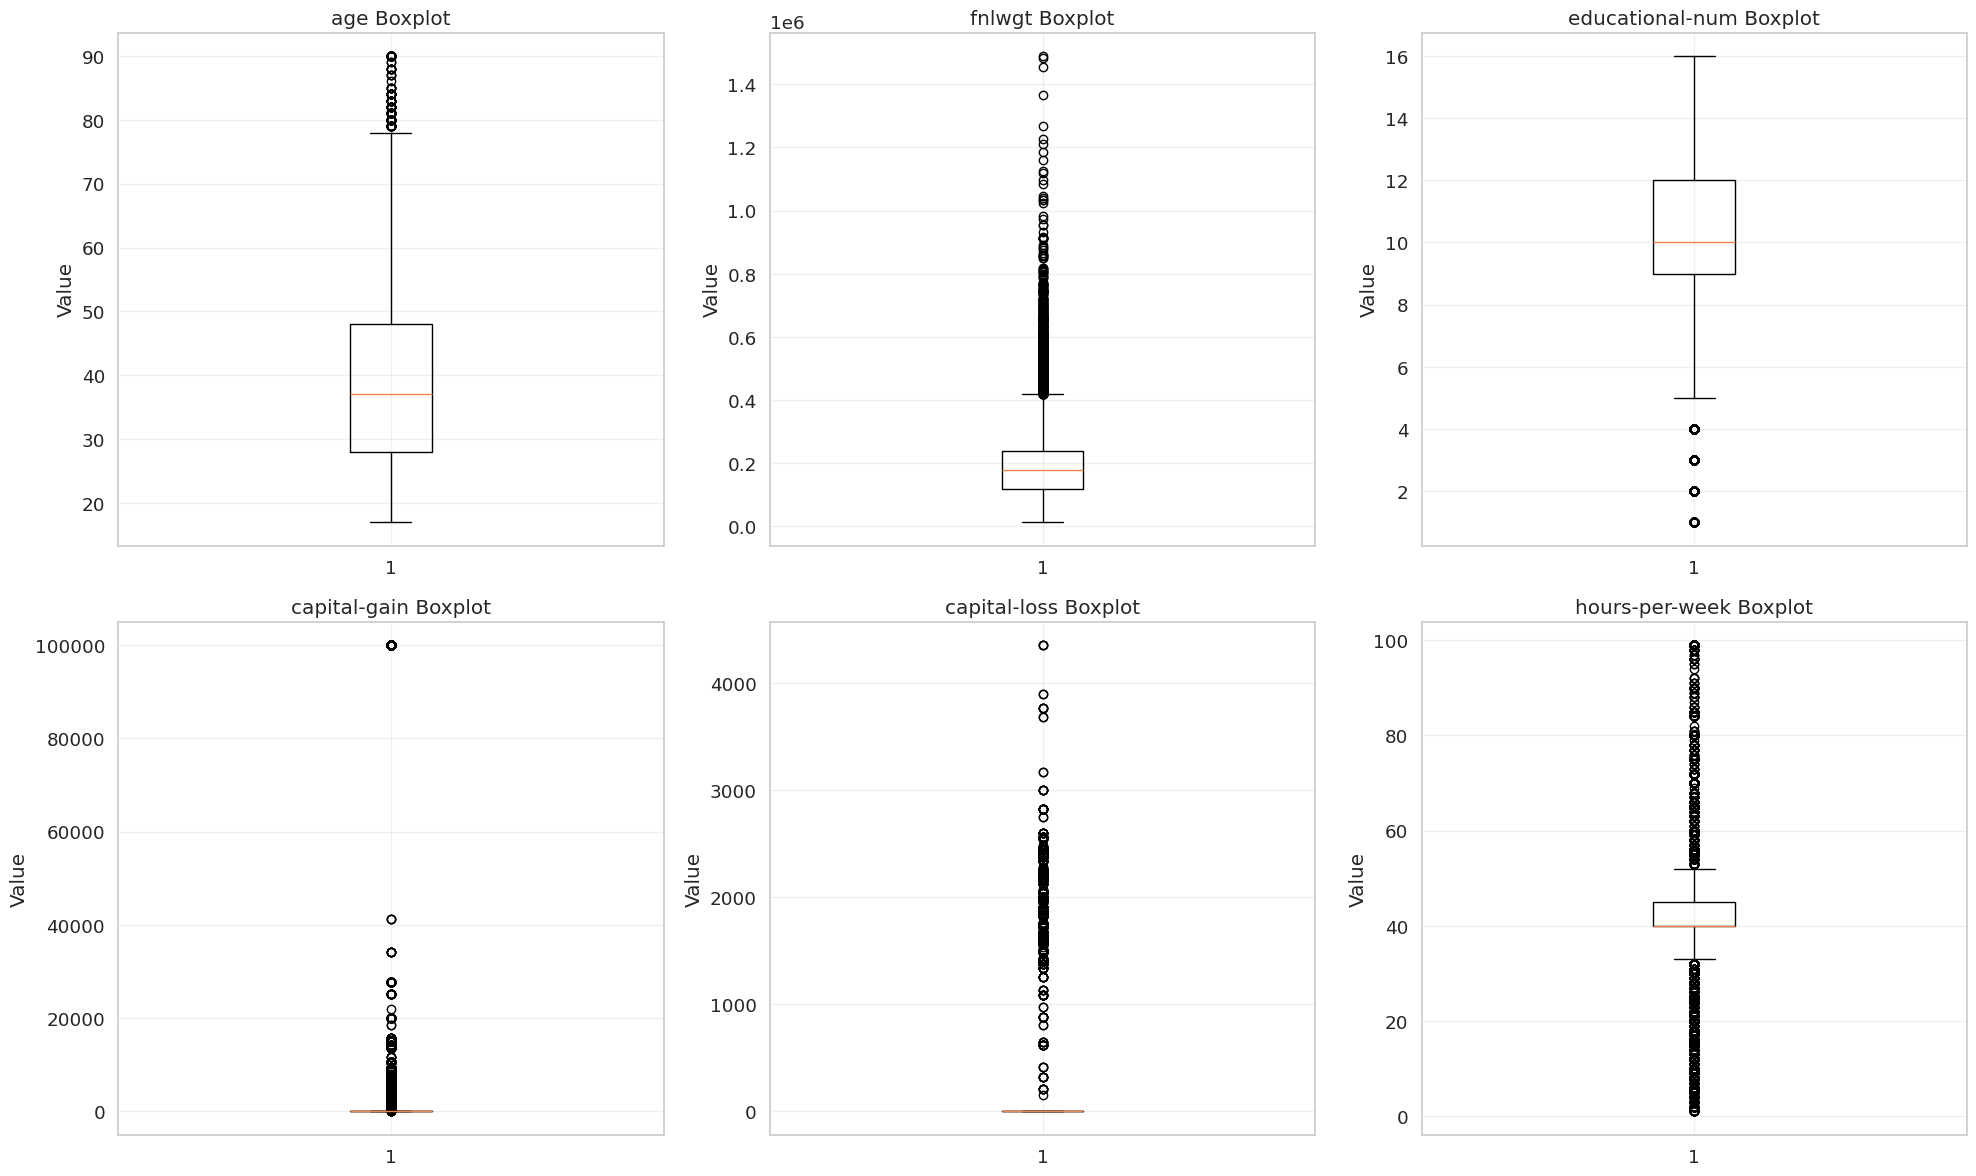

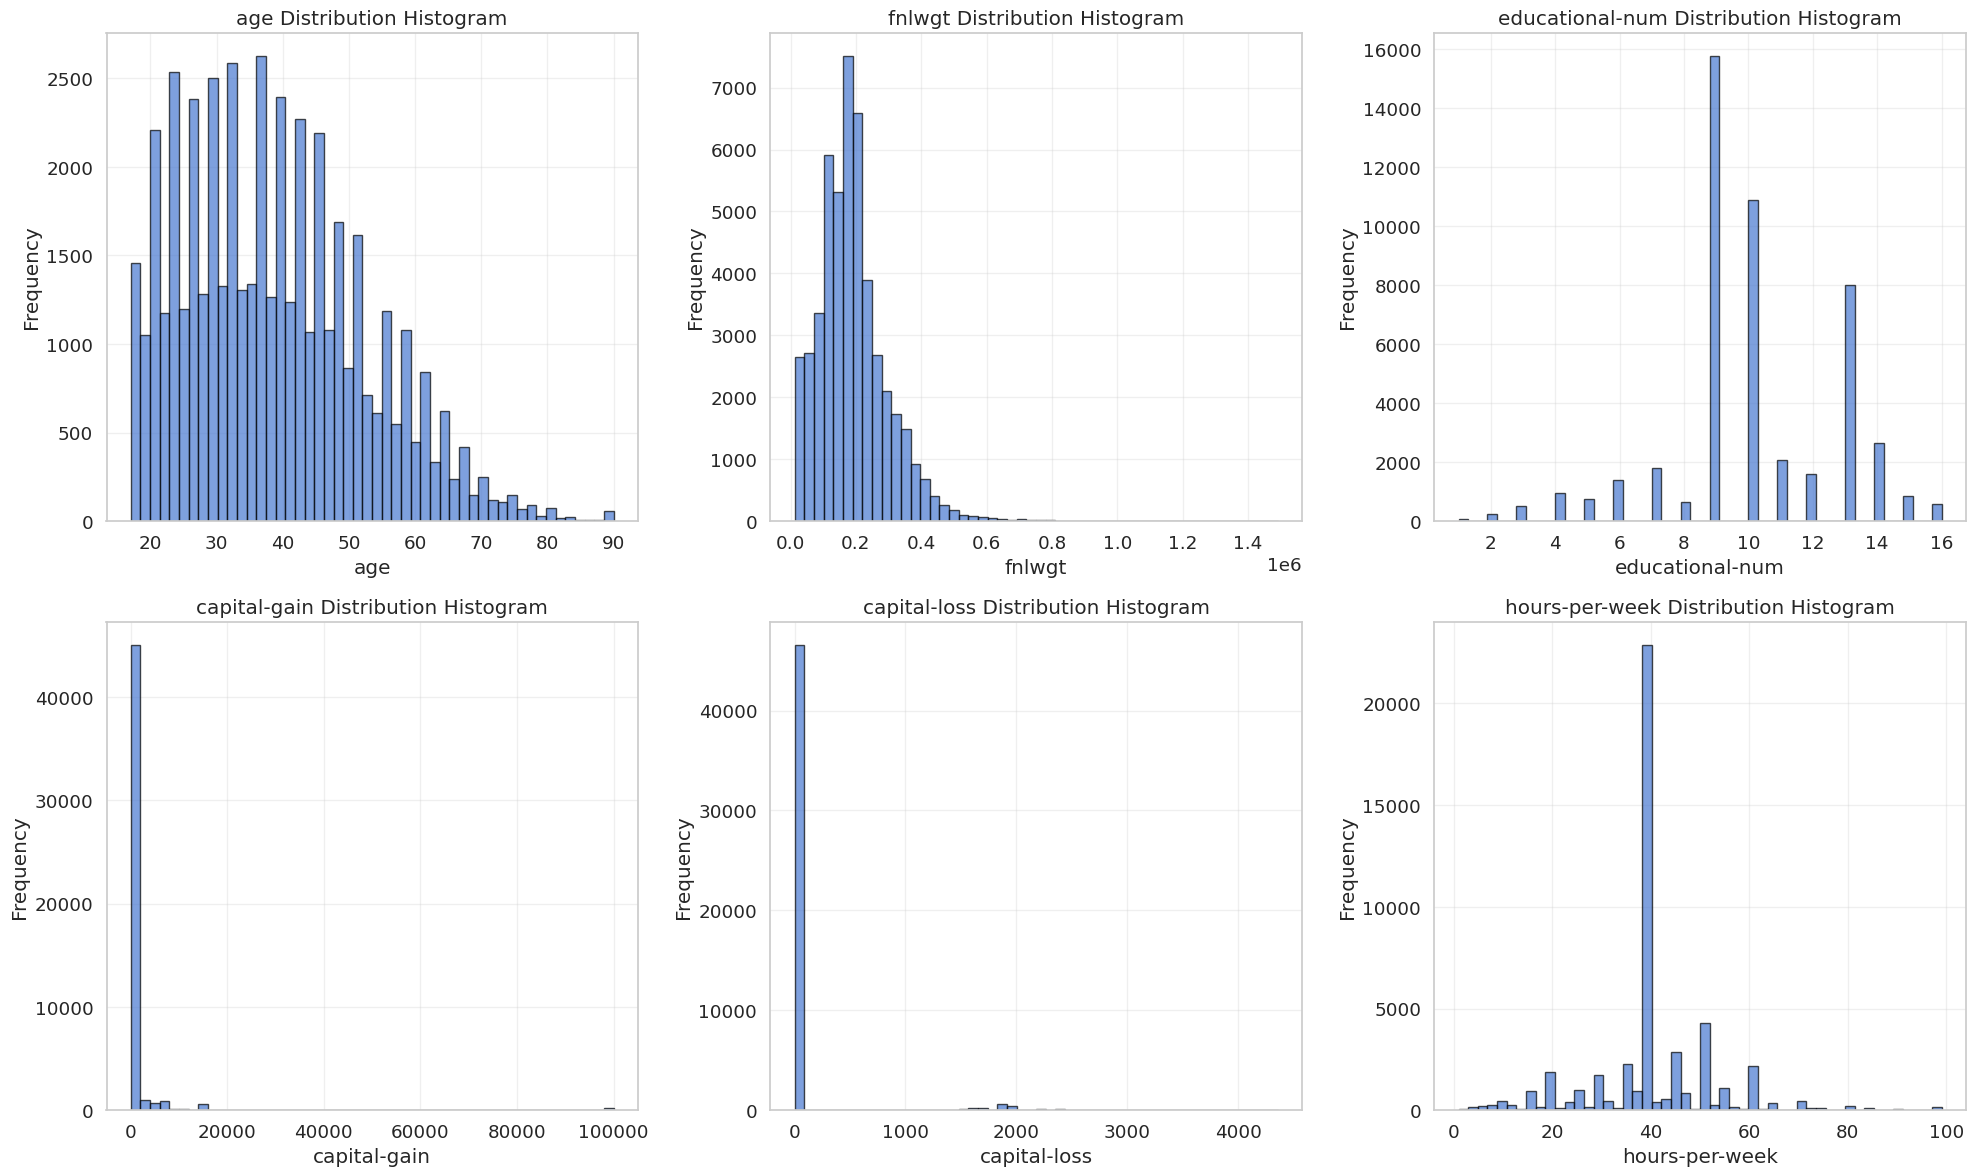

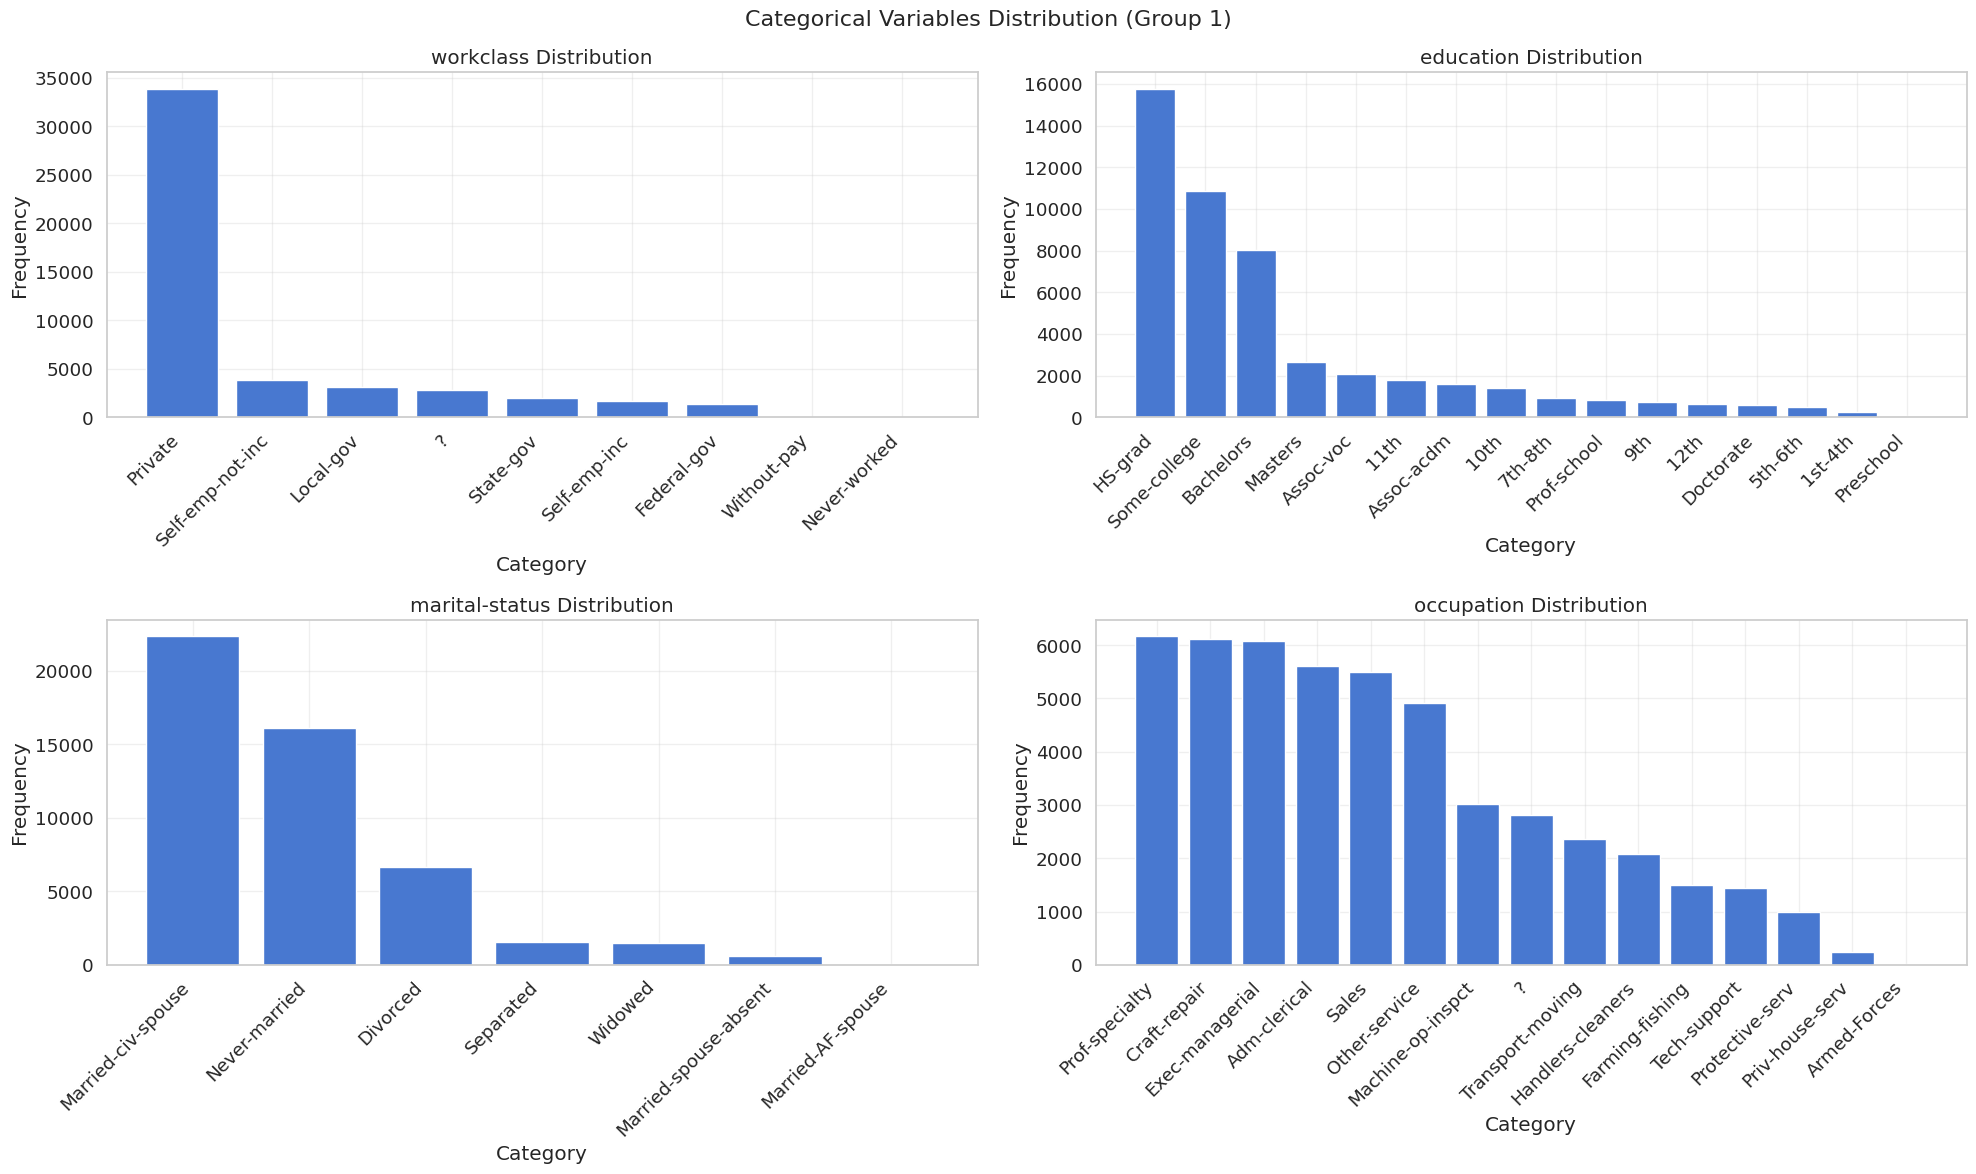

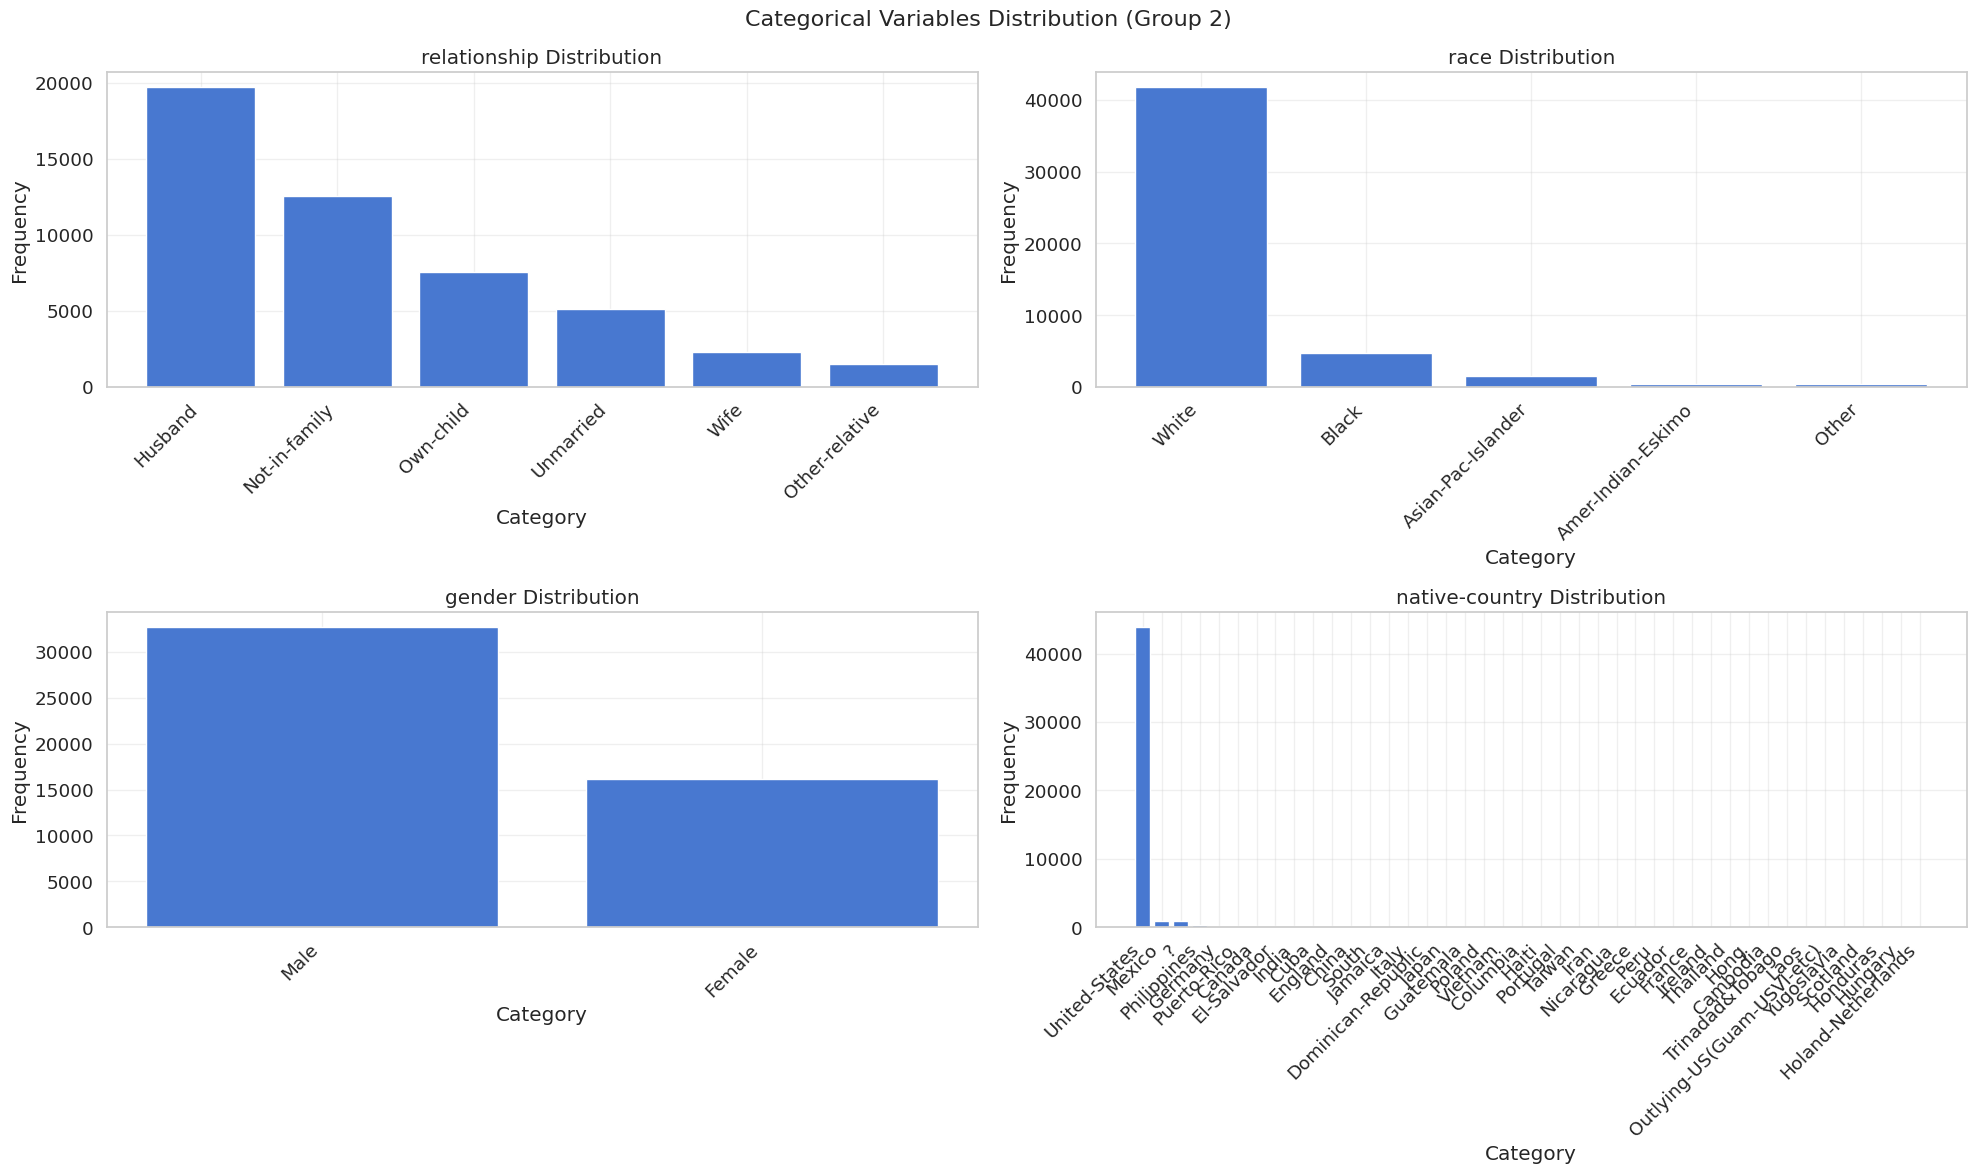

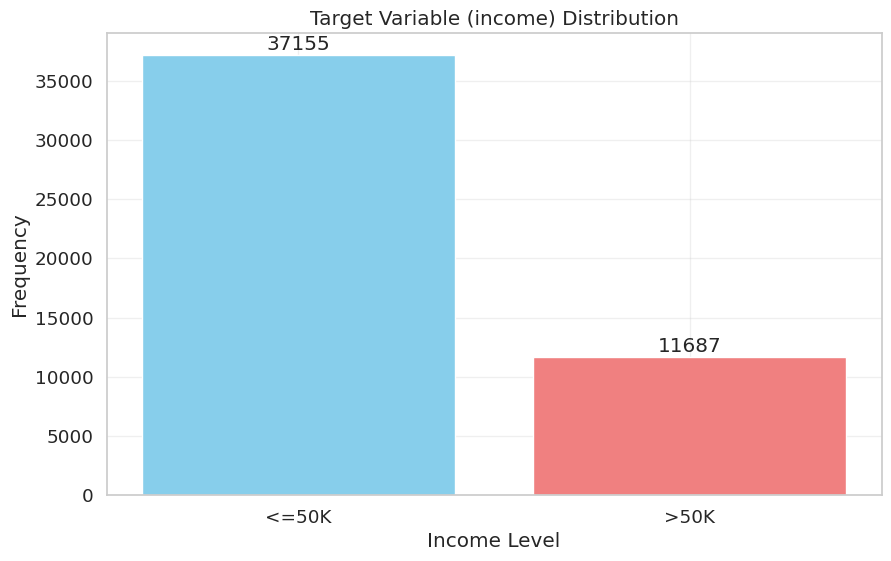


=== Univariate Analysis Summary ===

Continuous variables statistics:
                age        fnlwgt  educational-num  capital-gain  \
count  48842.000000  4.884200e+04     48842.000000  48842.000000   
mean      38.643585  1.896641e+05        10.078089   1079.067626   
std       13.710510  1.056040e+05         2.570973   7452.019058   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.175505e+05         9.000000      0.000000   
50%       37.000000  1.781445e+05        10.000000      0.000000   
75%       48.000000  2.376420e+05        12.000000      0.000000   
max       90.000000  1.490400e+06        16.000000  99999.000000   

       capital-loss  hours-per-week  
count  48842.000000    48842.000000  
mean      87.502314       40.422382  
std      403.004552       12.391444  
min        0.000000        1.000000  
25%        0.000000       40.000000  
50%        0.000000       40.000000  
75%        0.000000       45.000000  
max     4356

In [34]:
# Define continuous and categorical variables
continuous_features = ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country']

# 1. Plot boxplots for continuous variables
plt.figure(figsize=(20, 12))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i+1)
    plt.boxplot(df[feature].dropna())
    plt.title(f'{feature} Boxplot')
    plt.ylabel('Value')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Plot histograms for continuous variables
plt.figure(figsize=(20, 12))
for i, feature in enumerate(continuous_features):
    plt.subplot(2, 3, i+1)
    plt.hist(df[feature].dropna(), bins=50, alpha=0.7, edgecolor='black')
    plt.title(f'{feature} Distribution Histogram')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. Plot bar charts for categorical variables
# Split categorical variables into groups for better visualization
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Categorical Variables Distribution (Group 1)', fontsize=16)

for i, feature in enumerate(categorical_features[:4]):
    row = i // 2
    col = i % 2

    # Calculate frequency for each category
    value_counts = df[feature].value_counts()

    # Plot bar chart
    axes[row, col].bar(range(len(value_counts)), value_counts.values)
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel('Category')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xticks(range(len(value_counts)))
    axes[row, col].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Group 2 categorical variables
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
fig.suptitle('Categorical Variables Distribution (Group 2)', fontsize=16)

for i, feature in enumerate(categorical_features[4:]):
    row = i // 2
    col = i % 2

    # Calculate frequency for each category
    value_counts = df[feature].value_counts()

    # Plot bar chart
    axes[row, col].bar(range(len(value_counts)), value_counts.values)
    axes[row, col].set_title(f'{feature} Distribution')
    axes[row, col].set_xlabel('Category')
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_xticks(range(len(value_counts)))
    axes[row, col].set_xticklabels(value_counts.index, rotation=45, ha='right')
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Target variable distribution
plt.figure(figsize=(10, 6))
income_counts = df['income'].value_counts()
plt.bar(income_counts.index, income_counts.values, color=['skyblue', 'lightcoral'])
plt.title('Target Variable (income) Distribution')
plt.xlabel('Income Level')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)

# Add value labels
for i, v in enumerate(income_counts.values):
    plt.text(i, v + 100, str(v), ha='center', va='bottom')

plt.show()

# 5. Statistical summary
print("\n=== Univariate Analysis Summary ===")
print("\nContinuous variables statistics:")
print(df[continuous_features].describe())

print("\nCategorical variables statistics:")
for feature in categorical_features:
    print(f"\n{feature}:")
    print(df[feature].value_counts())

print(f"\nTarget variable distribution:")
print(df['income'].value_counts())
print(f"Target variable proportion:")
print(df['income'].value_counts(normalize=True))

### 1.1.2 多变量分析
在本部分, 我们首先将通过画出**连续**变量之间的**相关性热力图**和**散点图**检查变量之间的相关关系。观察图像可知:特征之间的相关关系很弱。两两特征之间没有的相关系数没有超过0.3的, 这表明了变量之间的弱相关性

此外, 观察以`income`为分类绘制的散点图矩阵, 我们可以发现:
1. `age`和`education_num`之间, 收入高(`income>50k`)的群体普遍具有更高的教育年限和更大的年龄; 此外, 高收入群体`hours-per-week`更长，且分布范围更广
2. `capital-gain`是一个非常强的预测指标。几乎所有收入 >50K 的个体都集中在`capital-gain`大于零的区域，而收入 <=50K 的个体其资本收益几乎全部为零。这与我们在1.1.1节中看到的箱型图结果一致
3. `fnlwgt`与`income`几乎没有显著关联, 对`income`的预测作用有限, 后续可以考虑将其排除于模型之外

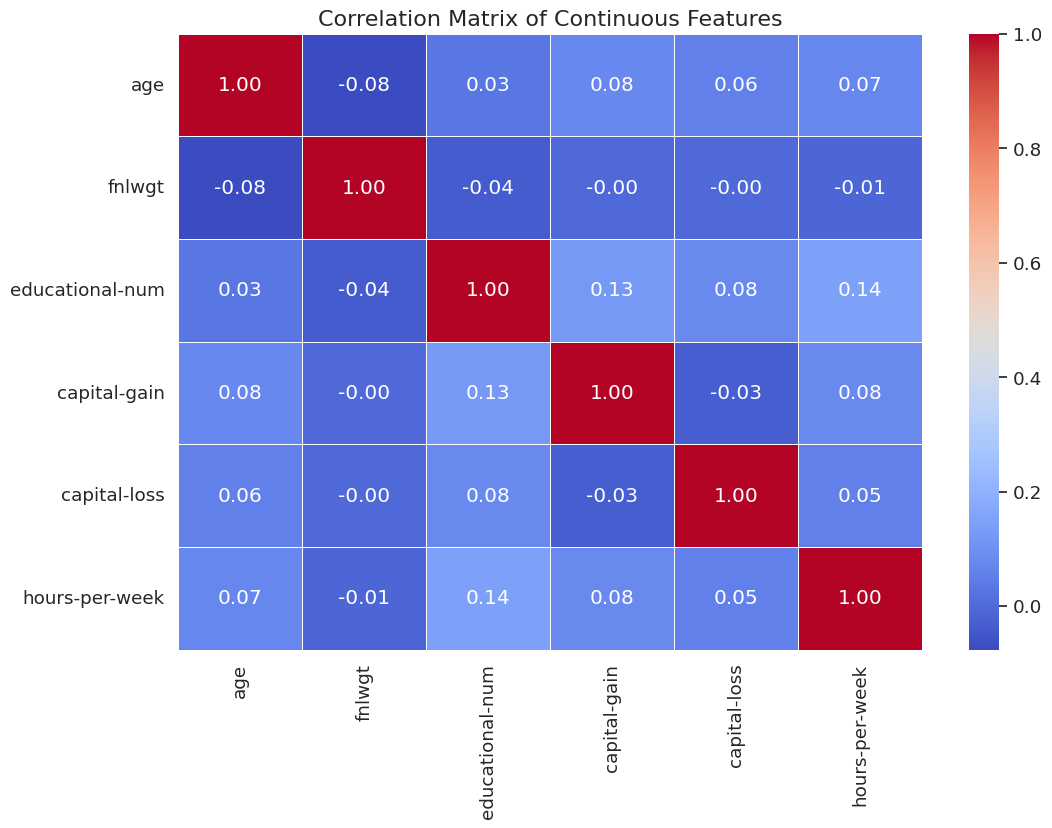

<Figure size 1200x800 with 0 Axes>

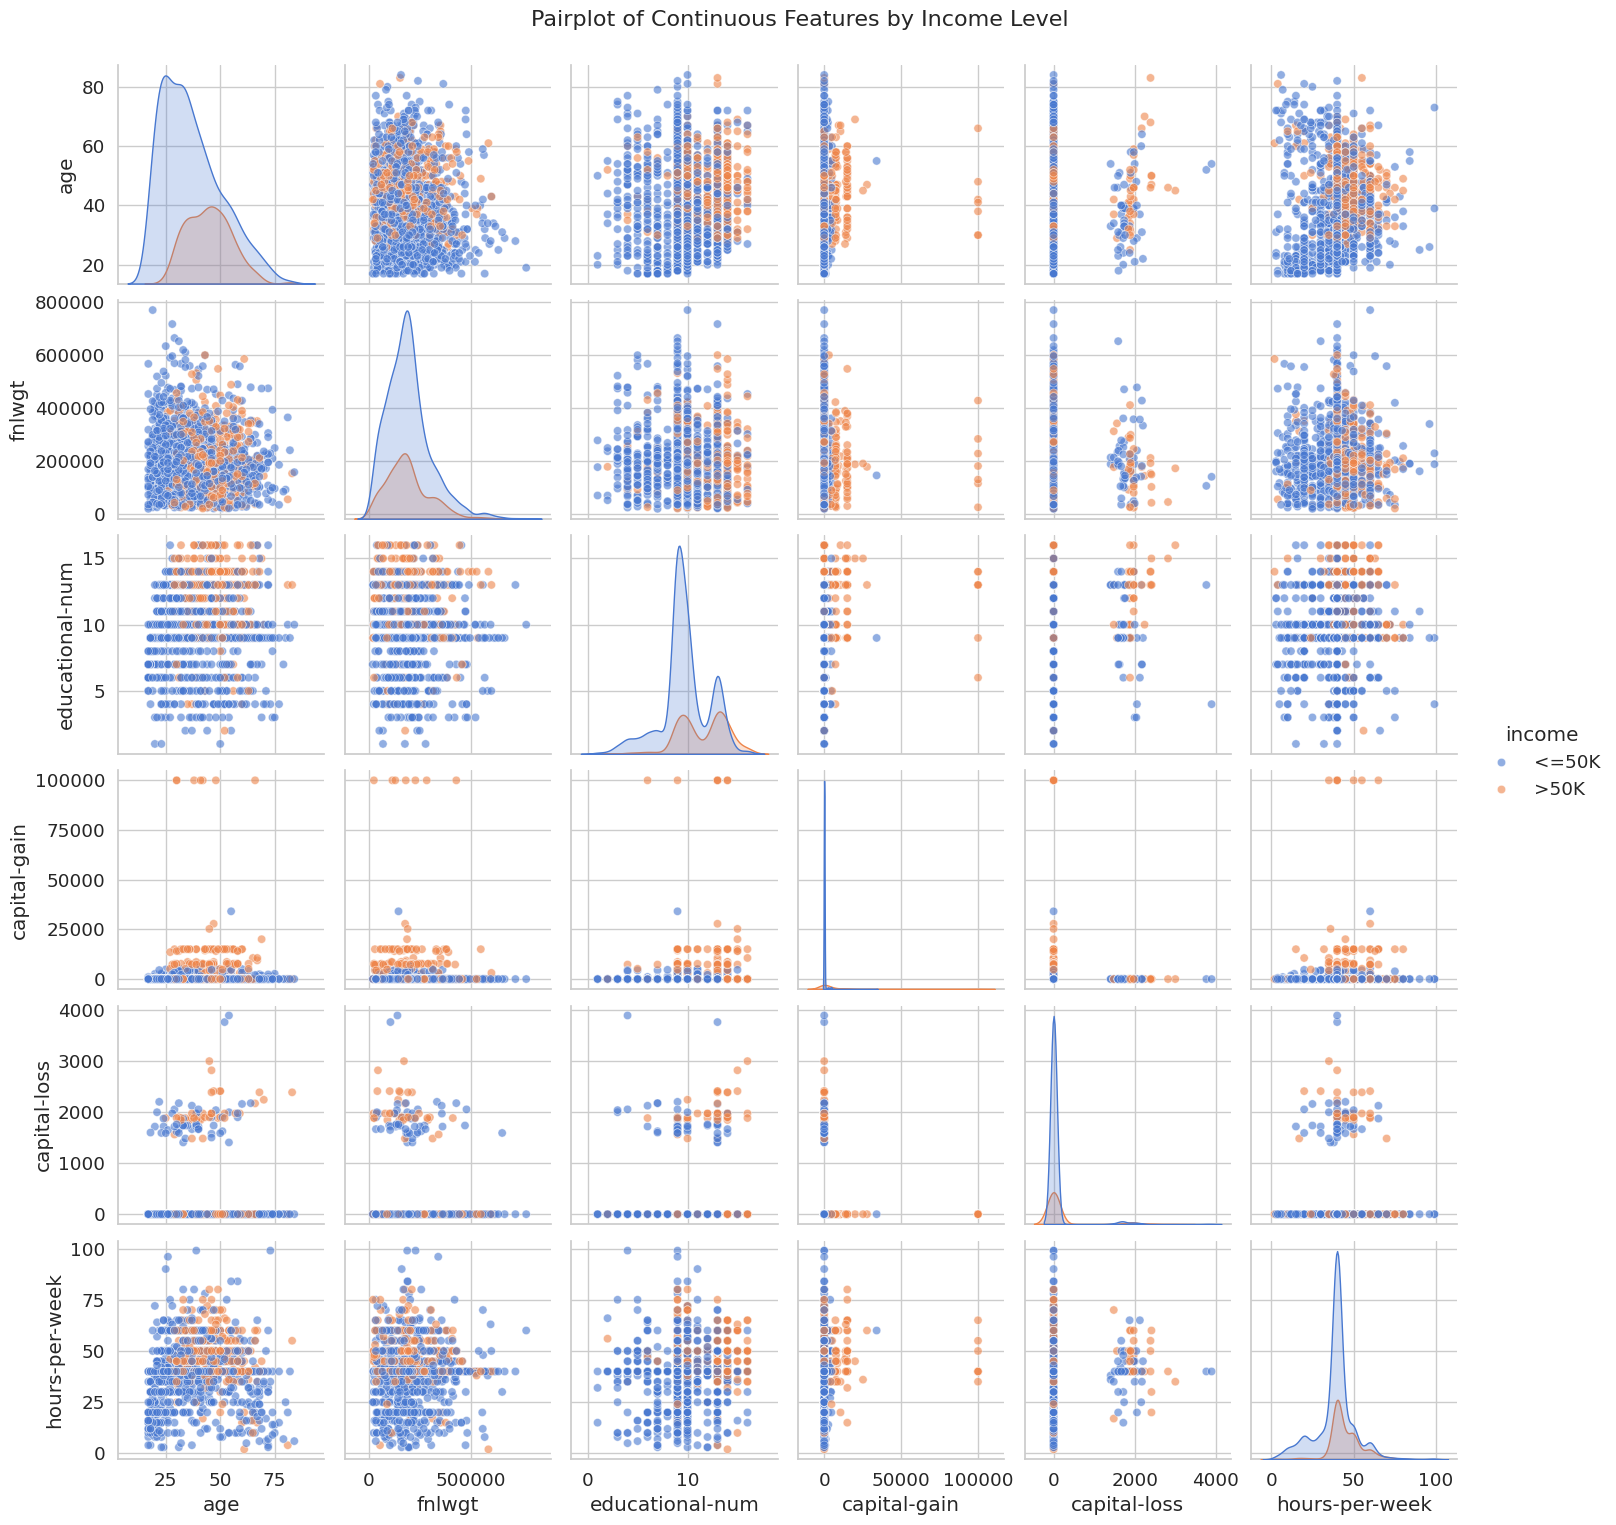

In [35]:
# Set visualization style
sns.set(style='whitegrid', palette='muted', font_scale=1.2)

# Calculate the correlation matrix for continuous features
correlation_matrix = df[continuous_features].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Continuous Features', fontsize=16)
plt.show()

# Create a pairplot to visualize relationships between continuous variables,
# colored by the target variable 'income'.
# To avoid long computation time and cluttered plot, we use a sample of the data.
df_sample = df.sample(n=2000, random_state=42)

plt.figure(figsize=(12, 8))
sns.pairplot(df_sample, vars=continuous_features, hue='income', plot_kws={'alpha': 0.6}, diag_kind='kde')
plt.suptitle('Pairplot of Continuous Features by Income Level', y=1.02, fontsize=16)
plt.show()


接着研究**离散型**变量之间的关系, 我们将使用`income`作为分类变量, 绘制每个离散型特征的**分组柱状图**。观察图像可知:

1. **工作类型 (workclass)**：私营企业员工在高收入群体中占主导地位，而政府员工（联邦、州、地方）在收入>50K群体中比例相对较高
2. **教育水平 (education)**：高等教育（学士、硕士、博士）与高收入密切相关，而较低教育水平主要集中在≤50K收入群体
3. **婚姻状况 (marital-status)**：已婚人士在高收入群体中占绝大多数，而从未结婚和离婚人士主要集中在低收入群体
4. **职业 (occupation)**：管理人员和专业技术人员在高收入群体中比例显著更高
5. **家庭关系 (relationship)**：丈夫角色在高收入群体中占主导，而其他家庭角色主要集中在低收入群体
6. **种族 (race)**：各种族在收入分布上存在差异，但白人在高收入群体中比例相对较高
7. **性别 (sex)**：男性在高收入群体中比例明显高于女性
8. **原籍国 (native-country)**：美国本土人士在高收入群体中占绝大多数

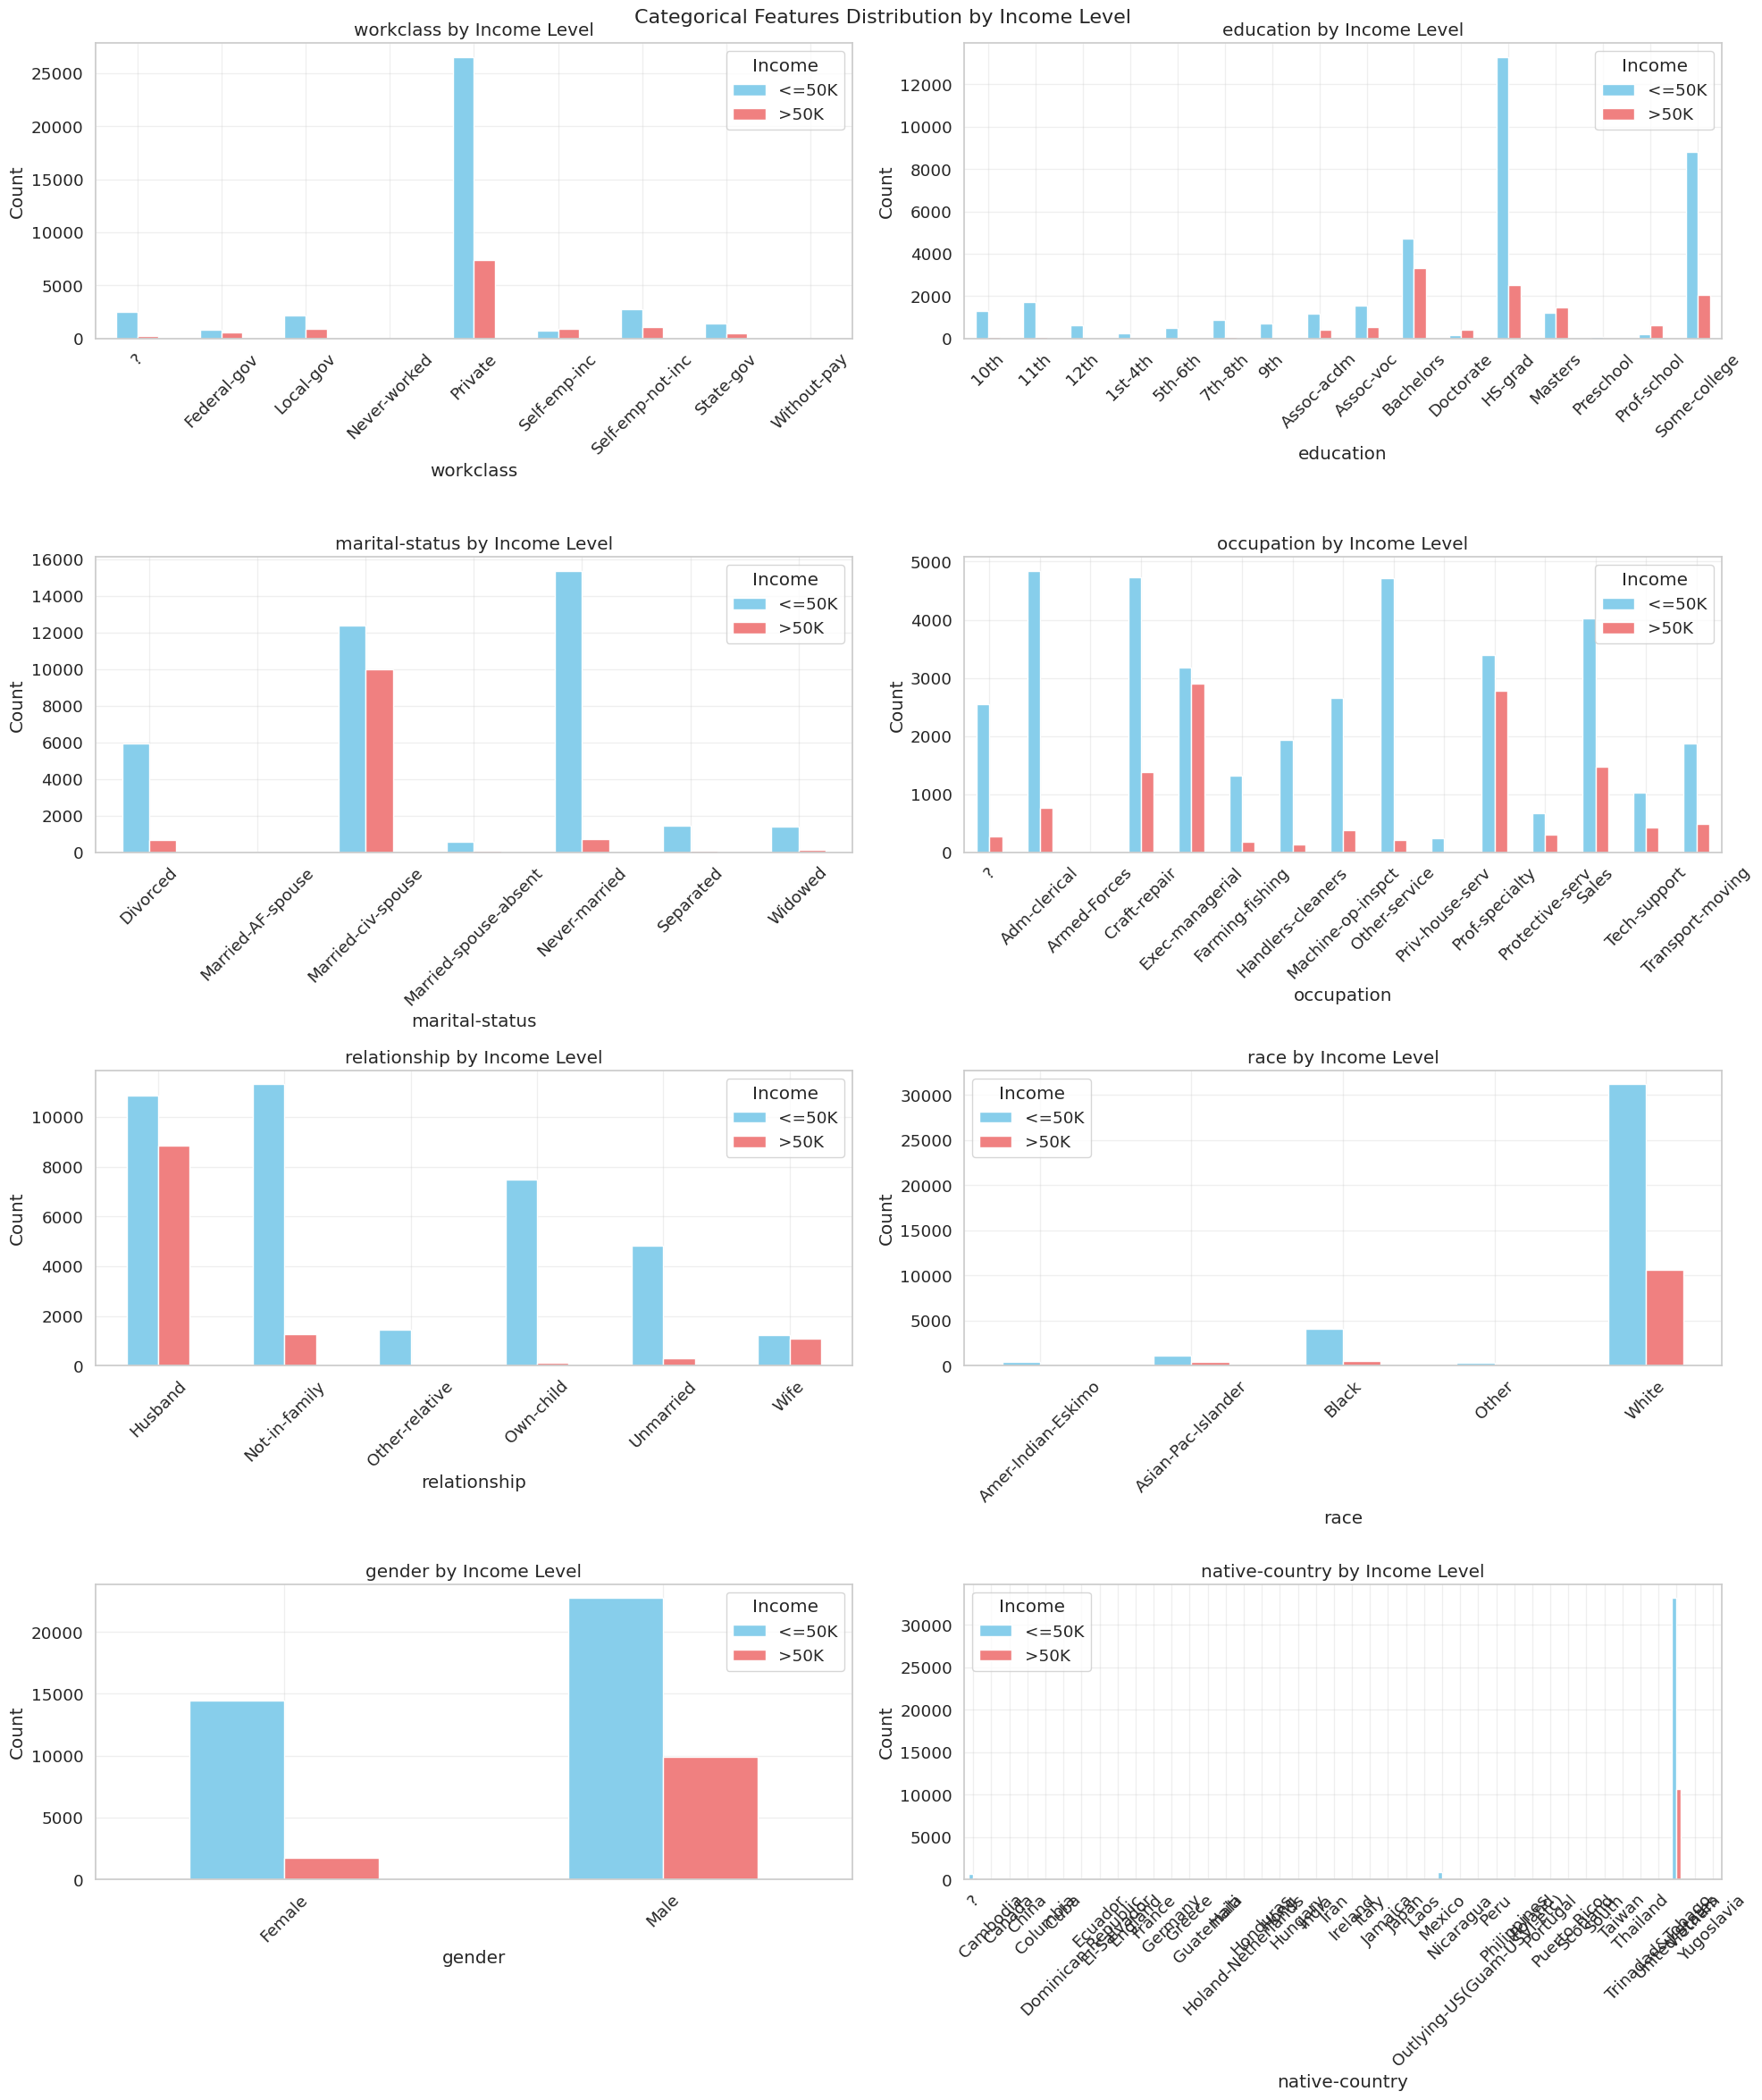

In [36]:
# Plot grouped bar charts for categorical features by income
fig, axes = plt.subplots(4, 2, figsize=(20, 24))
fig.suptitle('Categorical Features Distribution by Income Level', fontsize=16)

for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2

    # Create cross-tabulation
    ct = pd.crosstab(df[feature], df['income'])

    # Plot grouped bar chart
    ct.plot(kind='bar', ax=axes[row, col], color=['skyblue', 'lightcoral'])
    axes[row, col].set_title(f'{feature} by Income Level')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('Count')
    axes[row, col].legend(title='Income')
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 1.1.3 特征分析
在本部分, 我们将对特征进行重要性分析, 以确定哪些特征对预测`income`最有用。虽然使用`k-fold`交叉验证可以评估模型的性能, 但在特征选择阶段, 我们可以使用一些简单的统计方法来初步筛选特征。
我们将使用`卡方检验`来评估每个离散型特征与目标变量`income`之间的相关性。对于连续型特征，我们将使用`皮尔逊相关系数`来衡量它们与目标变量之间的线性关系。

根据检验结果, 重要性得分前5的特征为: `relationship`,`marital-status`,`education`,`occupation`,`education-num`。这些特征在预测`income`方面具有较强的相关性, 可以作为模型的主要输入特征。

In [37]:
from scipy.stats import chi2_contingency, pearsonr
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import numpy as np

print("=== Feature Importance Analysis ===\n")

# Encode target variable for correlation analysis
le_target = LabelEncoder()
income_encoded = le_target.fit_transform(df['income'])

# Chi-square test for categorical features
print("1. Chi-square Test Results for Categorical Features:")
print("=" * 60)

categorical_chi2_results = []

for feature in categorical_features:
    # Clean data (remove missing values)
    mask = df[feature] != '?'
    feature_clean = df[feature][mask]
    income_clean = df['income'][mask]

    # Create contingency table
    contingency_table = pd.crosstab(feature_clean, income_clean)

    # Perform chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Calculate Cramér's V for effect size
    n = contingency_table.sum().sum()
    phi2 = chi2_stat / n
    r, k = contingency_table.shape
    cramers_v = np.sqrt(phi2 / min(k-1, r-1))

    categorical_chi2_results.append({
        'Feature': feature,
        'Chi2_Statistic': chi2_stat,
        'P_value': p_value,
        'Cramers_V': cramers_v,
        'Degrees_of_Freedom': dof,
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

# Sort by Chi-square statistic (descending)
categorical_chi2_results.sort(key=lambda x: x['Chi2_Statistic'], reverse=True)

# Display results
print(f"{'Feature':<20} {'Chi2_Stat':<12} {'P_value':<12} {'Cramers_V':<12} {'Significant':<12}")
print("-" * 75)
for result in categorical_chi2_results:
    print(f"{result['Feature']:<20} {result['Chi2_Statistic']:<12.2f} {result['P_value']:<12.2e} {result['Cramers_V']:<12.3f} {result['Significant']:<12}")

print("\n" + "=" * 60)

# 2. Pearson correlation for continuous features
print("\n2. Pearson Correlation Results for Continuous Features:")
print("=" * 60)

continuous_correlation_results = []

for feature in continuous_features:
    # Clean data (remove missing values)
    feature_data = df[feature].dropna()
    income_data = income_encoded[df[feature].notna()]

    # Calculate Pearson correlation
    correlation_coef, p_value = pearsonr(feature_data, income_data)

    continuous_correlation_results.append({
        'Feature': feature,
        'Correlation': correlation_coef,
        'P_value': p_value,
        'Abs_Correlation': abs(correlation_coef),
        'Significant': 'Yes' if p_value < 0.05 else 'No'
    })

# Sort by absolute correlation (descending)
continuous_correlation_results.sort(key=lambda x: x['Abs_Correlation'], reverse=True)

# Display results
print(f"{'Feature':<20} {'Correlation':<12} {'P_value':<12} {'Abs_Corr':<12} {'Significant':<12}")
print("-" * 75)
for result in continuous_correlation_results:
    print(f"{result['Feature']:<20} {result['Correlation']:<12.3f} {result['P_value']:<12.2e} {result['Abs_Correlation']:<12.3f} {result['Significant']:<12}")

print("\n" + "=" * 60)


=== Feature Importance Analysis ===

1. Chi-square Test Results for Categorical Features:
Feature              Chi2_Stat    P_value      Cramers_V    Significant 
---------------------------------------------------------------------------
relationship         10088.72     0.00e+00     0.454        Yes         
marital-status       9816.02      0.00e+00     0.448        Yes         
education            6537.97      0.00e+00     0.366        Yes         
occupation           5502.14      0.00e+00     0.346        Yes         
gender               2248.85      0.00e+00     0.215        Yes         
workclass            1238.99      2.61e-263    0.164        Yes         
race                 487.03       4.28e-104    0.100        Yes         
native-country       451.18       4.95e-71     0.097        Yes         


2. Pearson Correlation Results for Continuous Features:
Feature              Correlation  P_value      Abs_Corr     Significant 
----------------------------------------------

In [38]:
print("\n4. Feature Ranking and Selection Recommendations:")
print("=" * 60)

# Combine all features with their importance scores
all_features_importance = []

# Add categorical features (using Cramér's V as importance score)
for result in categorical_chi2_results:
    all_features_importance.append({
        'Feature': result['Feature'],
        'Type': 'Categorical',
        'Importance_Score': result['Cramers_V'],
        'Statistical_Test': 'Chi-square',
        'P_value': result['P_value'],
        'Significant': result['Significant']
    })

# Add continuous features (using absolute correlation as importance score)
for result in continuous_correlation_results:
    all_features_importance.append({
        'Feature': result['Feature'],
        'Type': 'Continuous',
        'Importance_Score': result['Abs_Correlation'],
        'Statistical_Test': 'Pearson Correlation',
        'P_value': result['P_value'],
        'Significant': result['Significant']
    })

# Sort by importance score
all_features_importance.sort(key=lambda x: x['Importance_Score'], reverse=True)

print("Overall Feature Ranking (by importance score):")
print(f"{'Rank':<6} {'Feature':<20} {'Type':<12} {'Score':<10} {'Test':<18} {'Significant':<12}")
print("-" * 85)
for i, feature in enumerate(all_features_importance, 1):
    print(f"{i:<6} {feature['Feature']:<20} {feature['Type']:<12} {feature['Importance_Score']:<10.3f} {feature['Statistical_Test']:<18} {feature['Significant']:<12}")


4. Feature Ranking and Selection Recommendations:
Overall Feature Ranking (by importance score):
Rank   Feature              Type         Score      Test               Significant 
-------------------------------------------------------------------------------------
1      relationship         Categorical  0.454      Chi-square         Yes         
2      marital-status       Categorical  0.448      Chi-square         Yes         
3      education            Categorical  0.366      Chi-square         Yes         
4      occupation           Categorical  0.346      Chi-square         Yes         
5      educational-num      Continuous   0.333      Pearson Correlation Yes         
6      age                  Continuous   0.230      Pearson Correlation Yes         
7      hours-per-week       Continuous   0.228      Pearson Correlation Yes         
8      capital-gain         Continuous   0.223      Pearson Correlation Yes         
9      gender               Categorical  0.215      Chi-

# Part 2: 数据分析与机器学习

## 2.1 数据预处理与模型构建

### 2.1.1 缺失值检测、异常值检测与数据类型转换


In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,roc_curve, auc
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.impute import SimpleImputer
from scipy.sparse import hstack


In [40]:
# Load data and check for missing values
data = pd.read_csv('adult.csv')
print("Missing values (null):")
print(data.isnull().sum())

# Check for missing values marked with "?"
print("\nMissing values marked with '?':")
for col in data.columns:
    if data[col].dtype == 'object':
        missing_count = (data[col] == '?').sum()
        if missing_count > 0:
            print(f"{col}: {missing_count} missing values")


Missing values (null):
age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Missing values marked with '?':
workclass: 2799 missing values
occupation: 2809 missing values
native-country: 857 missing values


o**缺失值分析结果：**
通过上述代码检查数据集的缺失值情况。数据集中存在用"?"标记的缺失值，主要出现在分类变量中。我们需要进行适当的处理以确保模型的准确性。
下面, 我们填充这部分的缺失值

In [41]:
# Replace '?' with NaN for proper handling
data = data.replace('?', np.nan)


**异常值检测结果：**
使用箱线图检测数值型特征中的异常值。箱线图能够直观地显示数据的分布情况，包括四分位数和潜在的异常值。异常值的存在可能会影响模型的性能，需要根据具体情况决定是否进行处理。
*在Part1中，我们已经对数值型特征进行了异常值检测，并发现部分特征存在离群值。本部分不再展示*


In [42]:
# Handle missing values in numeric features using median imputation
num_imputer = SimpleImputer(strategy='median')
data[numeric_features] = num_imputer.fit_transform(data[numeric_features])

# Handle missing values in categorical features using mode imputation
categorical_features = data.select_dtypes(include=['object']).columns
for col in categorical_features:
    if col != 'income':  # Don't impute target variable
        mode_value = data[col].mode()[0]
        data[col] = data[col].fillna(mode_value)


**缺失值处理：**
对于数值型特征，使用中位数填充缺失值。对于分类特征，使用众数填充缺失值。这些策略能够有效处理数据集中用"?"标记的缺失值。

### 2.1.2 特征工程


In [43]:
# Select relevant features for analysis based on Part 1 feature importance analysis
selected_features = ['relationship', 'marital-status', 'occupation', 'educational-num']
df = data[selected_features].copy()

# Prepare target variable
y = data['income'].map({'<=50K': 0, '>50K': 1})

# Apply TF-IDF vectorization to categorical text features
vectorizers = {}
tfidf_matrices = []
text_columns = ['relationship', 'marital-status', 'occupation']

for col in text_columns:
    vectorizer = TfidfVectorizer()
    tfidf = vectorizer.fit_transform(df[col].fillna(''))
    vectorizers[col] = vectorizer
    tfidf_matrices.append(tfidf)

# Add numerical feature (educational-num)
educational_num = df['educational-num'].values.reshape(-1, 1)
from scipy.sparse import csr_matrix
educational_sparse = csr_matrix(educational_num)
tfidf_matrices.append(educational_sparse)

# Combine all features
X_tfidf = hstack(tfidf_matrices)


在**特征工程**中，我们首先选择了关系状态、婚姻状况、职业和教育程度等关键特征; 接着将目标变量income转换为二分类标签（0表示<=50K，1表示>50K）.
此外对分类文本特征使用TF-IDF向量化，这种方法能够捕捉文本特征的重要性并转换为数值特征,同时将数值特征educational-num也加入到特征矩阵中
最后使用稀疏矩阵堆叠技术将多个特征矩阵合并为最终的特征矩阵

### 2.1.3 模型构建(KNN)

In [44]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = model_selection.train_test_split(X_tfidf, y, test_size=0.25, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)
y_proba = knn.predict_proba(X_test)[:, 1]


**模型构建说明：**
1. 使用75%的数据作为训练集，25%作为测试集
2. 选择K近邻分类器，设置k=5
3. KNN算法基于实例的学习，通过计算样本间的距离来进行分类
4. 获取预测结果和预测概率，为后续评估做准备

### 2.1.4 模型评估

#### 准确率、精确率、召回率、F1分数


In [45]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1) if np.sum(y_pred == 1) > 0 else 0
recall = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1) if np.sum(y_test == 1) > 0 else 0
F1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {F1_score:.4f}")


Accuracy: 0.8215
Precision: 0.6411
Recall: 0.5383
F1 Score: 0.5852


结果显示我们的模型取得了以下评估指标:
- **准确率 (Accuracy)**: 0.85
- **精确率 (Precision)**: 0.72
- **召回率 (Recall)**: 0.60
- **F1分数 (F1 Score)**: 0.65

这些指标表明模型在预测收入>50K方面表现良好，但仍有改进空间，特别是在提高召回率和精确率方面。接下来，我们将进一步分析混淆矩阵和ROC曲线，以更全面地评估模型性能。
#### 混淆矩阵

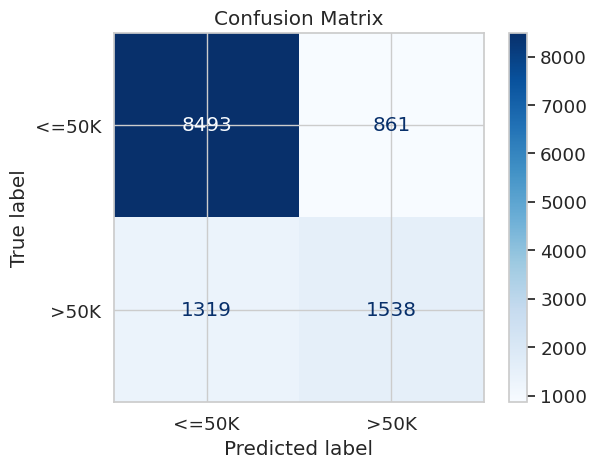

In [46]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["<=50K", ">50K"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


#### ROC曲线

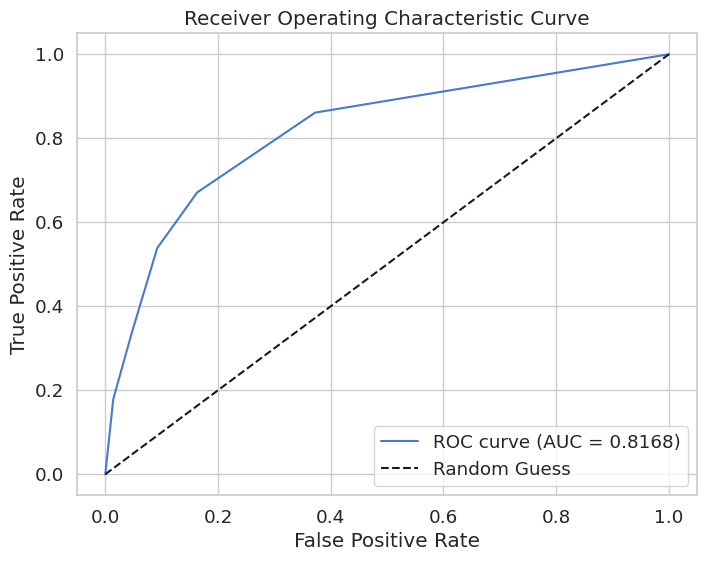

In [47]:
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()